In [1]:
# Import the necessary libraries

# Data handling
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import math

# Null value imputation using advanced statistical methods
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Visualization libraries
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Configuration
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # to display all columns of the DataFrames



In [2]:
df = pd.read_csv('data/finanzas-hotel-bookings.csv', index_col=0)

/home/adduser/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (1,2,5,13,14,15,16,20,21,26,30,32) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
def drop_columns(df, columns_to_drop):
    
    df.drop(columns=columns_to_drop, inplace=True)
    return df



In [4]:
# Drop column 0  and reservation_status_date

columns_drop = ["0", "reservation_status_date", "company"]

df = drop_columns(df,columns_drop)

In [5]:
# Filter rows where all values are NaN
df[df.isnull().all(axis=1)].shape

(63215, 29)

In [6]:
# Drop rows where all values are NaN
df = df.dropna(how='all')

In [7]:
# Filter rows where all values are NaN
df[df.isnull().all(axis=1)].shape

(0, 29)

In [8]:
# Filter df dropping the columns that had values while all the others are Nan
df_filt = df.drop(columns=['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights']) 

In [9]:
# We store in a variable the indices of the rows where everything is NaN, except in those 3 columns (these are 100 rows, less than 1% of the total)
index = df_filt[df_filt.isnull().all(axis=1)].index 

In [10]:
df.shape

(119662, 29)

In [11]:
# Drop the 100 rows filtering by index 
df.drop(index=index, inplace=True)

In [12]:
df.shape

(119562, 29)

In [13]:
df.arrival_date_month.value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
November      6794
December      6780
March         5922
February      4898
3             3872
January       3581
2             3170
1             2348
Name: arrival_date_month, dtype: int64

In [14]:
# Mapping dictionary to convert values from categoric to numeric
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5,
    'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10,
    'November': 11, 'December': 12, '1':1, '2':2, '3':3
}

# Apply the mapping dict to the month column
df.arrival_date_month = df.arrival_date_month.map(month_mapping).astype(float) # It has to be float because there are NaN values

In [15]:
df.arrival_date_month.value_counts()

8.0     13877
7.0     12661
5.0     11791
10.0    11160
4.0     11089
6.0     10939
9.0     10508
3.0      9794
2.0      8068
11.0     6794
12.0     6780
1.0      5929
Name: arrival_date_month, dtype: int64

In [16]:
df.adr.min()

-6.38

In [17]:
df.adr = abs(df.adr) # Convert values to absolute to correct the negative value

In [18]:
df.adr.min()

0.0

In [19]:
df.shape

(119562, 29)

In [20]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,False,342.0,2015.0,7.0,27.0,1.0,0.0,0.0,2.0,NaN,0.0,BB,PRT,NaN,Direct,0.0,NaN,0.0,C,C,3.0,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out
1,Resort Hotel,False,737.0,NaN,7.0,27.0,1.0,0.0,0.0,2.0,NaN,0.0,BB,NaN,NaN,Direct,0.0,0.0,0.0,NaN,C,4.0,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out
2,Resort Hotel,False,7.0,2015.0,7.0,27.0,1.0,0.0,1.0,1.0,0.0,0.0,BB,GBR,NaN,Direct,0.0,0.0,0.0,A,C,0.0,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out
3,Resort Hotel,False,13.0,NaN,7.0,27.0,1.0,0.0,1.0,1.0,NaN,0.0,BB,GBR,Corporate,Corporate,0.0,0.0,0.0,A,A,0.0,304.0,0.0,Transient,75.0,0.0,0.0,Check-Out
4,Resort Hotel,False,14.0,NaN,7.0,NaN,1.0,0.0,2.0,2.0,NaN,0.0,BB,NaN,Online TA,TA/TO,0.0,0.0,0.0,A,A,0.0,240.0,0.0,Transient,98.0,0.0,1.0,Check-Out


In [21]:
# Delete duplicate rows, keeping only the first appearance

df.drop_duplicates(keep='first', inplace=True)

In [22]:
def impute_special_category_nulls(df):
    
    
    # Define the imputations for each column
    imputations = {
        'country': 'Undefined',
        'market_segment': 'Undefined',
        'customer_type': 'Undefined',
        'reserved_room_type': 'Undefined'
    }

    # Impute the missing values
    for column, value in imputations.items():
        df[column].fillna(value, inplace=True)
    
    return df


In [23]:
df = impute_special_category_nulls(df)

In [24]:
def impute_nulls_with_mode(df):
    
    
    # List of columns to impute with the mode
    columns = ['reservation_status', 'hotel', 'is_canceled', 'distribution_channel', 'meal', 'assigned_room_type']

    # Impute missing values in each column with the mode
    for column in columns:
        mode_value = df[column].mode()[0]
        df[column].fillna(mode_value, inplace=True)
    
    return df


In [25]:
df = impute_nulls_with_mode(df)

In [26]:
# Get the list of numerical columns that have null values
nulls_in_num_cols = df[df.columns[df.isnull().any()]].select_dtypes(include=np.number).columns
print("The numerical columns that have null values are: \n")
print(nulls_in_num_cols)



The numerical columns that have null values are: 

Index(['lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')


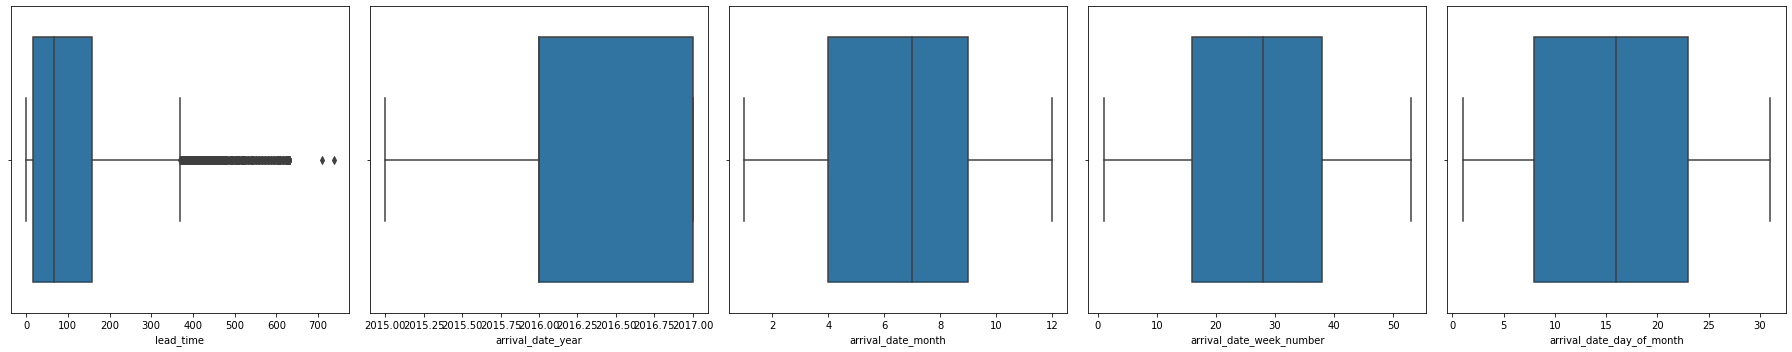

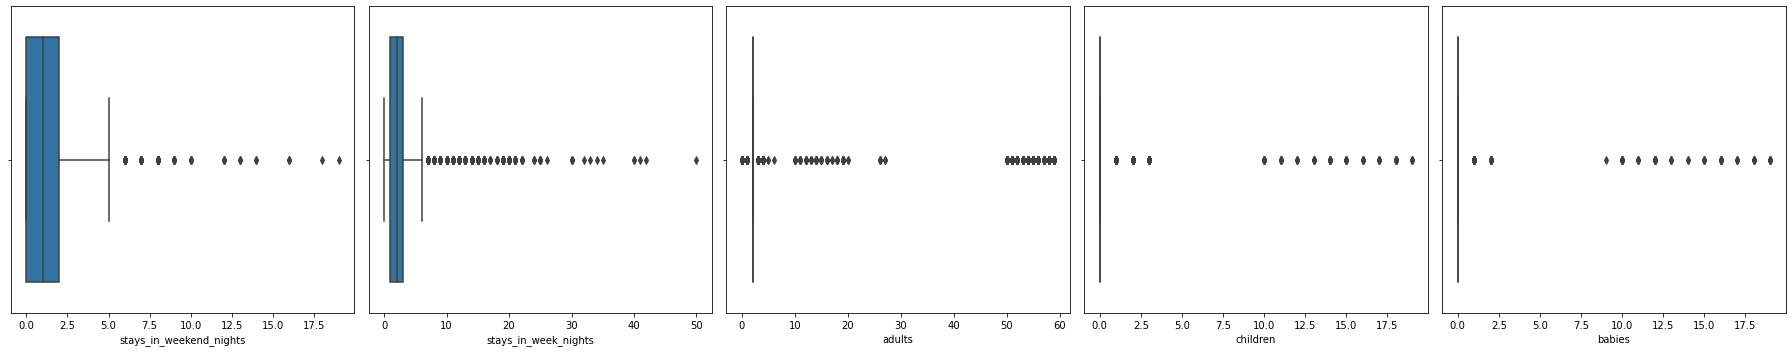

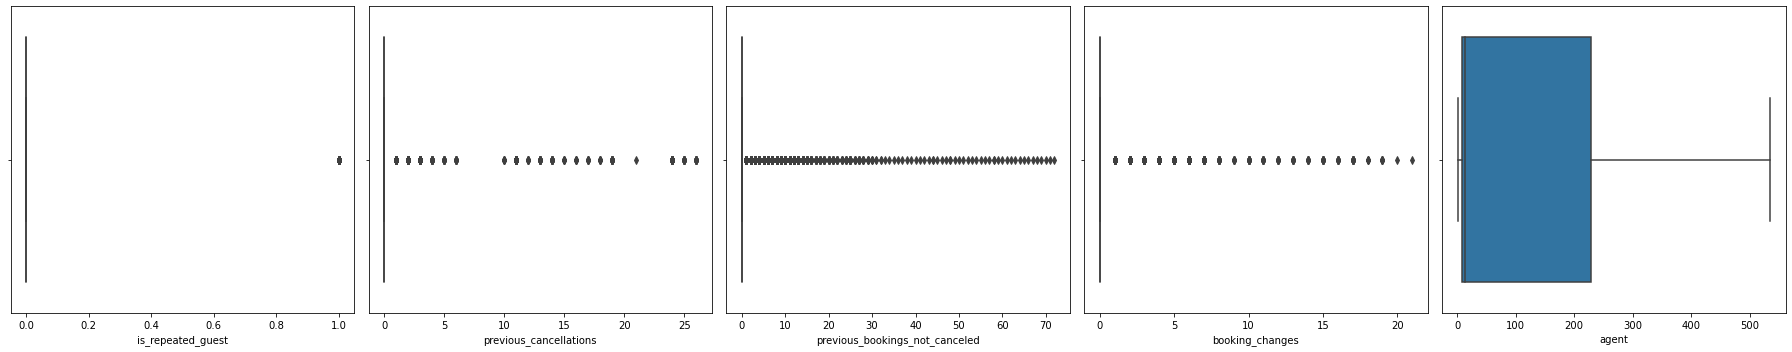

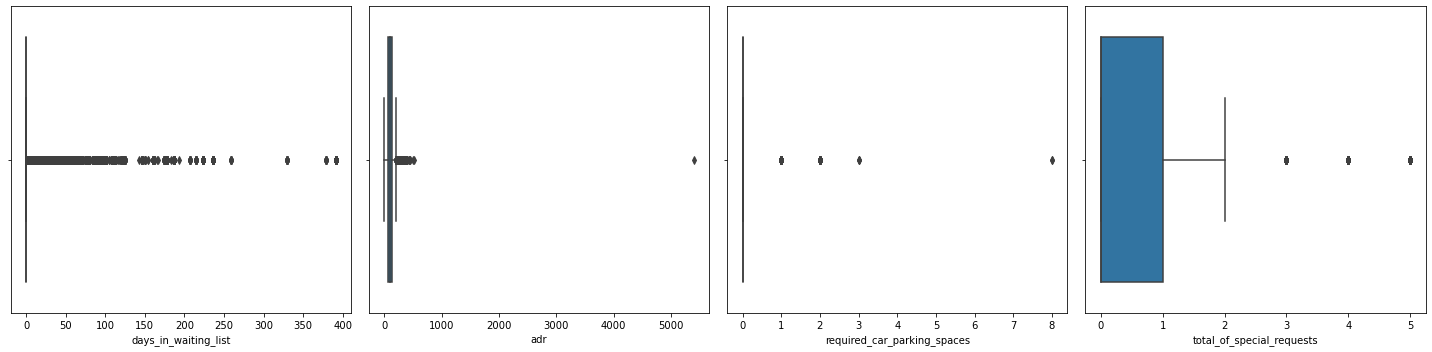

In [27]:

# List of numerical columns with null values
nulls_in_num_cols = [
    'lead_time', 'arrival_date_year', 'arrival_date_month',
    'arrival_date_week_number', 'arrival_date_day_of_month',
    'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
    'babies', 'is_repeated_guest', 'previous_cancellations',
    'previous_bookings_not_canceled', 'booking_changes', 'agent',
    'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
    'total_of_special_requests'
]

# Define the batch size
batch_size = 5

# Iterate over the columns in groups of 5
for i in range(0, len(nulls_in_num_cols), batch_size):
    # Select the group of columns
    cols_batch = nulls_in_num_cols[i:i + batch_size]
    
    # Calculate the number of columns for the grid
    num_cols = len(cols_batch)
    
    # Create the figure and axes for the subplots
    fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(5 * num_cols, 5))
    
    # Ensure that 'axes' is iterable, even if it's a single subplot
    if num_cols == 1:
        axes = [axes]
    
    # Create a boxplot for each column in the current batch
    for index, col in enumerate(cols_batch):
        sns.boxplot(x=col, data=df, ax=axes[index])
    
    # Adjust the layout
    plt.tight_layout()
    
    # Show the plot
    plt.show()


In [28]:
# Impute missing values with the median for columns with few nulls
columns_median = [
    'lead_time', 'arrival_date_month', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 
    'stays_in_week_nights', 'previous_bookings_not_canceled', 
    'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 
    'total_of_special_requests'
]

for col in columns_median:
    df[col].fillna(df[col].median(), inplace=True)

# Impute missing values with the mode for other columns
columns_mode = [
    'arrival_date_year', 'arrival_date_week_number', 
    'is_repeated_guest', 'previous_cancellations', 'agent', "adults"
]

for col in columns_mode:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [29]:
# Add the children and babies columns

df["total_children"] = df[["children", "babies"]].sum(axis=1, skipna=True)



In [30]:
# Drop column children  and babies

columns_drop2 = ["children", "babies"]

df = drop_columns(df,columns_drop2)

In [31]:
df.shape

(117547, 28)

In [32]:
df.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_children
24898,Resort Hotel,False,38.0,2016.0,6.0,23.0,3.0,2.0,3.0,2.0,BB,BRA,Online TA,TA/TO,0.0,0.0,0.0,Undefined,A,0.0,240.0,0.0,Undefined,126.60,1.0,1.0,Check-Out,0.0
4766,Resort Hotel,False,169.0,2016.0,3.0,14.0,31.0,0.0,3.0,2.0,BB,GBR,Groups,Direct,0.0,0.0,0.0,Undefined,A,1.0,9.0,0.0,Transient-Party,66.00,0.0,0.0,Check-Out,0.0
95935,City Hotel,False,210.0,2016.0,8.0,35.0,25.0,0.0,1.0,3.0,BB,Undefined,Undefined,Direct,0.0,0.0,0.0,E,E,0.0,9.0,0.0,Transient,180.90,1.0,2.0,Check-Out,1.0
49765,City Hotel,True,103.0,2016.0,4.0,17.0,19.0,0.0,2.0,50.0,BB,Undefined,Offline TA/TO,TA/TO,0.0,0.0,0.0,Undefined,A,0.0,119.0,0.0,Transient,115.00,0.0,0.0,Canceled,0.0
38189,Resort Hotel,False,307.0,2017.0,7.0,27.0,8.0,2.0,1.0,1.0,BB,Undefined,Undefined,TA/TO,0.0,0.0,0.0,Undefined,F,0.0,242.0,0.0,Undefined,168.60,0.0,2.0,Check-Out,0.0
42305,City Hotel,False,162.0,2015.0,9.0,33.0,4.0,1.0,2.0,2.0,HB,FRA,Undefined,TA/TO,0.0,0.0,0.0,Undefined,A,0.0,24.0,0.0,Transient-Party,85.17,0.0,2.0,Check-Out,0.0
28860,Resort Hotel,False,173.0,2016.0,10.0,41.0,5.0,2.0,5.0,2.0,BB,GBR,Undefined,TA/TO,0.0,0.0,0.0,Undefined,E,0.0,240.0,0.0,Transient,84.29,0.0,1.0,Check-Out,0.0
32350,Resort Hotel,False,2.0,2017.0,3.0,9.0,1.0,0.0,1.0,2.0,BB,PRT,Corporate,Direct,1.0,1.0,1.0,A,A,1.0,9.0,0.0,Transient,40.00,0.0,0.0,Check-Out,0.0
90265,City Hotel,False,112.0,2016.0,6.0,23.0,2.0,0.0,2.0,2.0,BB,Undefined,Offline TA/TO,TA/TO,0.0,0.0,0.0,A,A,0.0,3.0,0.0,Undefined,100.00,0.0,0.0,Check-Out,0.0
52105,City Hotel,True,57.0,2016.0,5.0,23.0,31.0,0.0,1.0,59.0,BB,PRT,Groups,TA/TO,0.0,0.0,0.0,A,A,0.0,9.0,0.0,Transient-Party,120.00,0.0,0.0,Canceled,0.0
